<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%EA%B8%B0%EB%B3%B8_%EB%B6%84%EB%A5%98_%EC%9D%98%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


# 패션 MNIST 데이터셋 임포트하기
* 패션 MNIST는 기존 MNIST 데이터셋의 대체제로 사용되며, 손글씨 숫자 이미지 대신 다양한 옷 이미지를 포함.
* 이 데이터셋은 기존 MNIST보다 더 어려운 문제를 제공하며, 머신 러닝 알고리즘의 작동을 확인하고 디버깅하는 데 적합.
* 패션 MNIST는 60,000개의 훈련 이미지와 10,000개의 테스트 이미지로 구성되어 있으며, TensorFlow를 통해 직접 액세스하고 로드할 수 있음.
* 이 데이터셋은 컴퓨터 비전 분야에서의 기초적인 프로그래밍 예제로 자주 활용됨.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


* load_data() 함수를 사용하여 Fashion MNIST 데이터셋을 로드하면, 네 개의 NumPy 배열이 반환됨. 이 배열들은 다음과 같이 구성됨.
 * train_images와 train_labels: 이 배열들은 모델의 학습에 사용되는 훈련 세트를 구성. train_images는 28x28 픽셀 크기의 이미지 배열이고, train_labels는 이 이미지들의 레이블을 나타내는 0에서 9 사이의 정수 배열.
 * test_images와 test_labels: 이 배열들은 모델의 성능을 테스트하는 데 사용되는 테스트 세트. test_images 역시 28x28 픽셀 크기의 이미지 배열이고, test_labels는 테스트 이미지의 레이블을 나타내는 정수 배열.

* 각 이미지는 옷의 종류를 나타내는 하나의 레이블과 연결되어 있으며, 데이터셋에는 클래스 이름이 포함되어 있지 않음.
* 따라서 이미지를 출력할 때 이를 식별하기 위해 별도의 변수에 클래스 이름을 저장해야 함.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

* 훈련 세트에는 60,000개의 레이블

In [5]:
len(train_labels)

60000

* 각 레이블은 0과 9 사이의 정수

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

* 테스트 세트에는 10,000개의 이미지

In [7]:
test_images.shape

(10000, 28, 28)

* 테스트 세트에는 10,000개의 이미지에 대한 레이블

In [8]:
len(test_labels)

10000

# 데이터 전처리

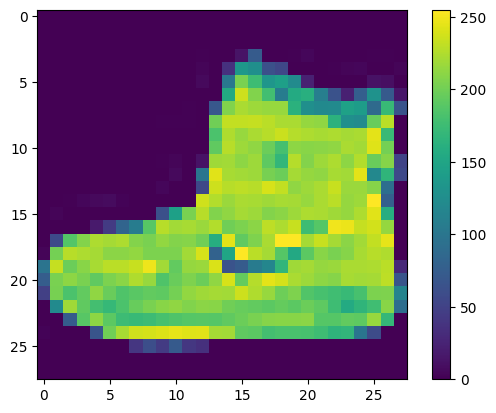

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

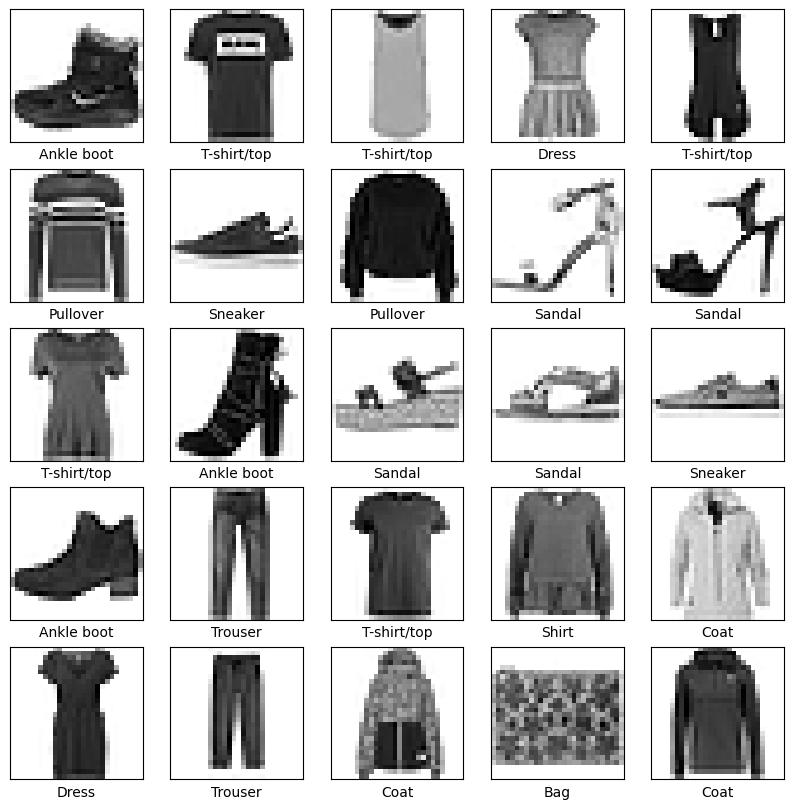

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

## 층 설증
* 신경망의 기본 빌딩 블록은 레이어
* 레이어는 레이어에 공급된 데이터로부터 표현을 추출
* 대부분 딥러닝은 간당한 층을 연결하여 구성. tf.keras.layers.Dense와 같은 층들의 가중치는 훈련하는 동안 학습됨

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

* 첫 번째 층은 28x28 픽셀의 2차원 이미지를 784 픽셀의 1차원 배열로 변환하는 "tf.keras.layers.Flatten". 이 층은 학습 가능한 가중치 없이 단순히 데이터의 형태만 변경.
* 두 개의 "tf.keras.layers.Dense"층이 연결. 첫 번째 Dense 층은 128개의 노드를 가지며, 두 번째 층은 10개의 노드의 소프트맥스 층으로, 10개의 클래스 각각에 대한 확률을 출력. 이 확률의 합은 1이 됨.


## 모델 컴파일
* 모델을 훈련하기 전에는 몇 가지 추가 설정이 필요. 이 설정들은 모델 컴파일 단계에서 이루어짐.
 1. 손실 함수: 모델의 정확도를 측정하며, 이를 최소화해야 함.
 2. 옵티마이저: 모델이 데이터를 어떻게 처리하고 학습할지 결정
 3. 메트릭: 정확도를 사용하여 올바르게 분류된 이미지의 비율을 평가

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련
* 신경망 모델을 훈련하는 과정은 다음과 같은 주요 단계로 구성됨.
 1. 훈련 데이터 주입: 모델에 훈련 데이터를 제공. 여기서는 train_images와 train_labels 배열을 사용.
 2. 학습 과정: 모델이 이미지와 해당 레이블 간의 관계를 학습.
 3. 테스트 세트 예측: 학습된 모델을 사용하여 테스트 데이터 세트 (test_images 배열)에 대한 예측을 수행.
 4. 예측 평가: 모델의 예측이 실제 레이블(test_labels 배열)과 얼마나 잘 일치하는지 평가.

## 모델 피드
* 훈련을 시작하려면 model.fit 메서드를 호출

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.5043 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3797 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3399 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3126 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2957 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2797 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2678 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2580 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2485 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

* 모델이 훈련되면서 손실과 정확도 지표가 출력됨

## 정확도 평가
* 모델이 테스트 데이터세트에서 작동하는 방식을 비교

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3539 - accuracy: 0.8783 - 780ms/epoch - 2ms/step

Test accuracy: 0.8783000111579895


* 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합 때문.
* 과대적합: 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말함
 * 과대적합 시연
 * 과대적합을 방지하기 위한 전략

## 예측하기
* 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있음.
* 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([6.4958374e-07, 1.4222378e-08, 7.9444007e-06, 3.8889628e-08,
       1.5775313e-07, 1.7191768e-03, 2.9363820e-05, 4.5995954e-02,
       1.5649535e-07, 9.5224655e-01], dtype=float32)

* 이 예측은 10개의 숫자 배열로 나타남. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타냄.

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

* 10개의 클래스에 대한 예측을 모두 그래프로 표현

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## 예측 확인
* 훈련도니 모델을 사용하여 일부 이미지에 대한 예측 수행

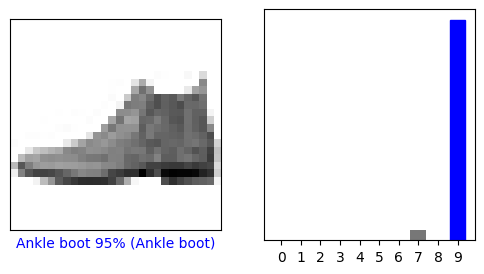

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

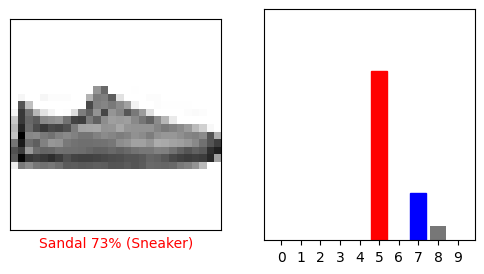

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

* 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색
* 숫자는 예측 레이블의 신뢰도 퍼센트
* 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

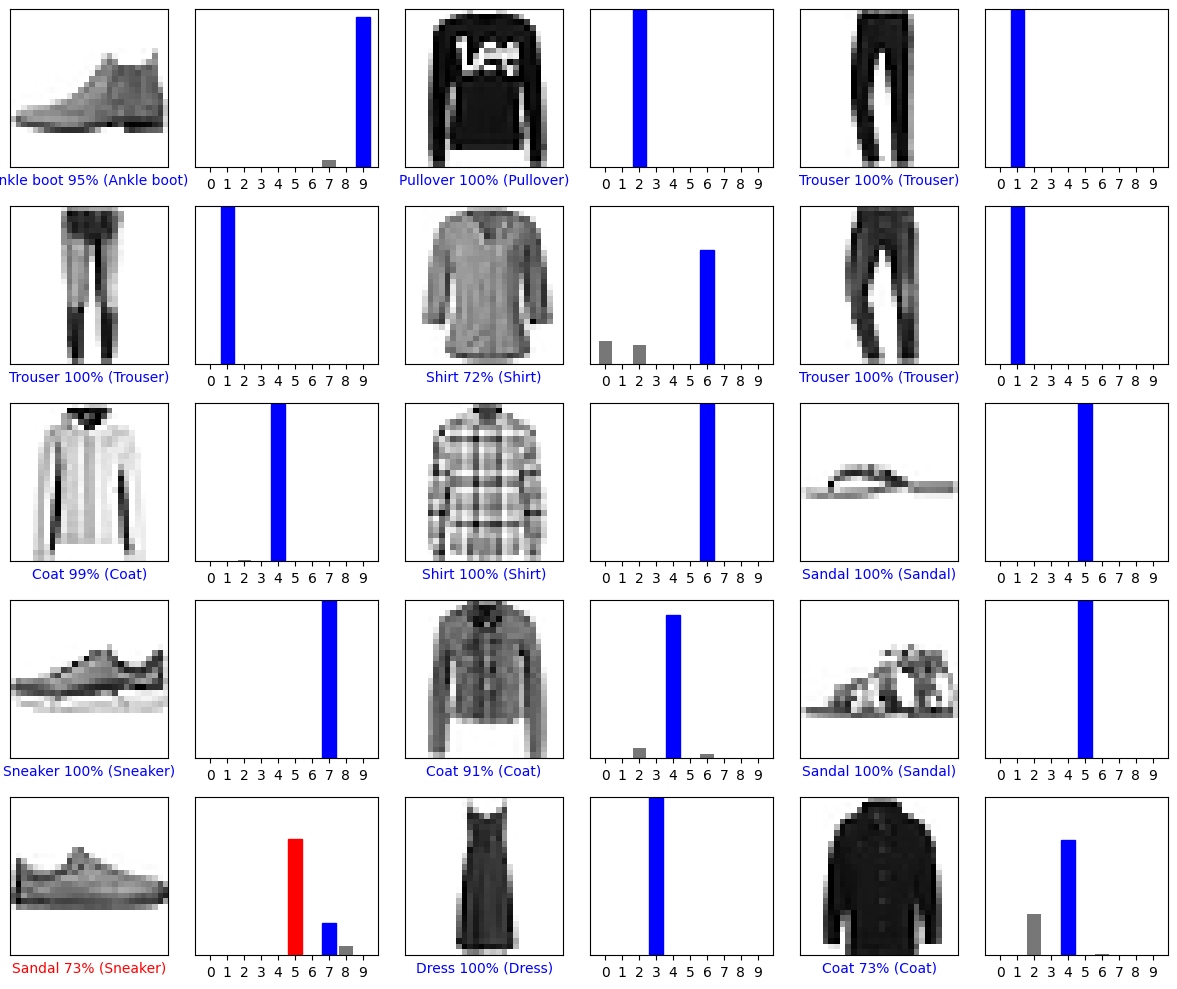

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 훈련된 모델 사용하기
* 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듦

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


* tf.keras 모델은 한 번에 묶음 또는 배치로 예측을 만드는데 최적화되어 있음.
* 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


* 이미지의 예측을 만듦

In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[8.0506197e-06 4.6611689e-13 9.9944001e-01 1.8758912e-12 4.6745254e-04
  1.2489926e-13 8.4488827e-05 7.2995732e-16 1.5477867e-14 2.1572561e-16]]


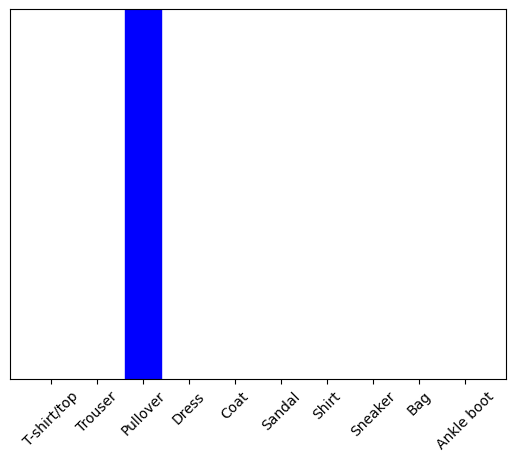

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

* tf.keras.Model.predict는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환
* 배치에서 이미지에 대한 예측을 가져옴

In [29]:
np.argmax(predictions_single[0])

2

* 예상과 같이 모델의 레이블을 예측